## Get Features and Targets Values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# use pandas to read csv file
data_file=pd.read_csv('Database_test.csv') 

# delete the first column of csv file since it is only the number index
data_file=data_file.iloc[:,1:]
data_file

,HOMO(S),LUMO(S),ELUMO-HOMO(S),#of N(S),#of C(S),MC_Fe(S),MC_N4(S),NC_Fe(S),NC_N4(S),IE(L),...,Dipole(S+L),MC_Fe(S+L),MC_N4(S+L),MC_L_1st(S+L),MC_L_total(S+L),NC_Fe(S+L),NC_N4(S+L),NC_L_1st(S+L),NC_L_total(S+L),Eb_Oxygen
0,-0.18922,-0.09384,0.09538,6,24,0.876334,-0.794682,0.88633,-0.562145,10.569973,...,1.499370,1.021740,-0.800654,-0.300157,-0.300157,0.89107,-0.530857,-0.31068,-0.31068,0.133298
1,-0.18922,-0.09384,0.09538,6,24,0.876334,-0.794682,0.88633,-0.562145,5.924781,...,0.620024,1.121790,-0.790439,-0.114728,-0.211221,0.97167,-0.538610,-0.18275,-0.21713,0.839246
2,-0.18922,-0.09384,0.09538,6,24,0.876334,-0.794682,0.88633,-0.562145,5.924781,...,0.756404,1.111040,-0.791258,-0.091569,-0.224072,0.98337,-0.537400,-0.16785,-0.24245,0.789150
3,-0.18922,-0.09384,0.09538,6,24,0.876334,-0.794682,0.88633,-0.562145,5.540575,...,1.610986,1.125960,-0.800556,-0.250336,-0.336100,0.98853,-0.546275,-0.60435,-0.35143,0.485005
4,-0.18922,-0.09384,0.09538,6,24,0.876334,-0.794682,0.88633,-0.562145,5.540575,...,1.610104,1.125900,-0.800535,-0.250221,-0.335744,0.98875,-0.546307,-0.60466,-0.35121,0.485011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.19102,-0.09492,0.09610,4,20,0.963687,-0.769773,1.07459,-0.604115,8.915844,...,1.396636,1.188110,-0.769401,-0.770243,0.136865,1.10834,-0.581835,-0.89835,0.15009,-0.107839
286,-0.19102,-0.09492,0.09610,4,20,0.963687,-0.769773,1.07459,-0.604115,8.721998,...,0.700683,1.266700,-0.767926,-0.358361,-0.325751,1.17506,-0.562235,-0.33029,-0.31289,0.382764
287,-0.19102,-0.09492,0.09610,4,20,0.963687,-0.769773,1.07459,-0.604115,7.878769,...,1.040163,0.964911,-0.740815,-0.234013,-0.234013,0.85340,-0.531388,-0.20028,-0.20028,0.879481
288,-0.19102,-0.09492,0.09610,4,20,0.963687,-0.769773,1.07459,-0.604115,8.944348,...,2.014651,1.100480,-0.762406,-0.075593,-0.350860,1.05302,-0.564858,-0.00888,-0.32669,0.160327


In [4]:
# get the features' values and transform them to numpy formart
train_value=data_file.iloc[:,:-1].values 

# get the targets' values and transform them to numpy formart
target_value=data_file.iloc[:,-1].values # target data

## Data Normalization

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
# use minmax scaler to do normalization for the input feature vectors
minmax_scaler=preprocessing.MinMaxScaler()
train_value_scaler=minmax_scaler.fit_transform(train_value)

In [9]:
'''
split the data into train and test data
'''
X_train_full,X_test,y_train_full,y_test=train_test_split(train_value_scaler,target_value,test_size=0.2,random_state=42)
# X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)
X_train_full.shape, X_test.shape,y_train_full.shape, y_test.shape

((232, 26), (58, 26), (232,), (58,))

## Rough Estimation

In [69]:
# use lazypredict to do a rough estimation for different regression models, the hyperparameters will be default values
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_full, X_test, y_train_full, y_test)

print(models)

 29%|███████████████████████████████████▏                                                                                       | 12/42 [00:00<00:01, 15.28it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|████████████████████████████████████████████████████████████████████████████▏                                              | 26/42 [00:02<00:01, 12.95it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 13.22it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
BaggingRegressor                             0.47       0.71   0.24   
GradientBoostingRegressor                    0.44       0.70   0.25   
XGBRegressor                                 0.44       0.69   0.25   
HistGradientBoostingRegressor                0.44       0.69   0.25   
RandomForestRegressor                        0.43       0.69   0.25   
LGBMRegressor                                0.43       0.69   0.25   
ExtraTreesRegressor                          0.27       0.60   0.28   
NuSVR                                        0.23       0.58   0.29   
SVR                                          0.23       0.58   0.29   
SGDRegressor                                 0.22       0.57   0.29   
AdaBoostRegressor                            0.21       0.57   0.29   
BayesianRidge                                0.20       0.57   0.30   
MLPReg

## Build the Model and Choose the Optimized Hyperparameters

In [10]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from lightgbm import LGBMRegressor

In [11]:
def rmse(y_true, y_pred):  
    return mean_squared_error(y_true, y_pred,squared=False)

def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

def mae(y_ture,y_pred):
    return mean_absolute_error(y_ture,y_pred)

def train_model(model, param_grid=[], X_train=[], y_train=[], X_test=[], y_test=[],
                splits=10, repeats=5):
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats,random_state=42)
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring="neg_mean_squared_error",
                               verbose=1, return_train_score=True)
# search the grid
        gsearch.fit(X_train,y_train)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_
        best_parameter=gsearch.best_params_
# get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']
# no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X_train,y_train, scoring="neg_mean_squared_error", cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('best parameters:',best_parameter)
    print('----------------------')
    print('train r2_score=',model.score(X_train,y_train))
    print('test r2_score=',model.score(X_test,y_test))
    print('rmse=',rmse(y_test, y_pred_test))
    print('mse=',mse(y_test, y_pred_test))
    print('mae=',mae(y_test, y_pred_test))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    plt.figure(figsize=(6,5))
    plt.scatter(y_test,y_pred_test,label='test data')
    plt.scatter(y_train,y_pred_train,label='train data')
    plt.plot(target_value,target_value,'-k')
    plt.legend()
    plt.xlabel('Eb(O) (eV)')
    plt.ylabel('Predicted Eb(O) (eV)')
    plt.title('test: r^2 = {:.3f}'.format(model.score(X_test,y_test)))
    plt.show()
 
    return model, cv_score, grid_results

In [12]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

### LightGBM

Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------------------
LGBMRegressor(random_state=42)
best parameters: {'n_estimators': 100}
----------------------
train r2_score= 0.9369070938487943
test r2_score= 0.7424935096133083
rmse= 0.24409922242252066
mse= 0.05958443038727921
mae= 0.1568993779253501
cross_val: mean= 0.09530609713771887 , std= 0.024456707200768427


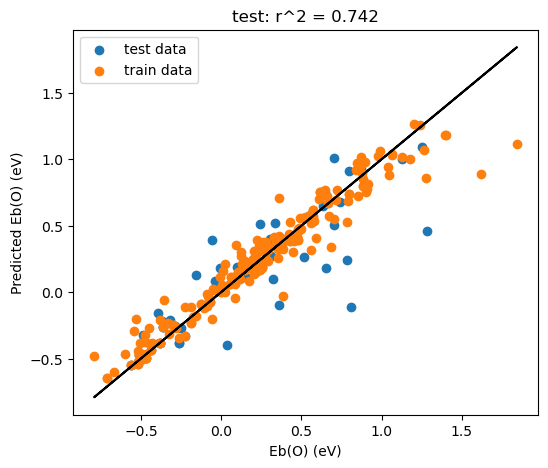

In [13]:
model = 'LGBMRegressor'
opt_models[model] = LGBMRegressor(random_state=42)

'''
you can write down the hyperparameters that you want to search in the param_grid
'''
param_grid = {'n_estimators':np.arange(50,450,50),
#               'max_features':[8,12,16,20,24],
#               'min_samples_split':[2,4,6]
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid,
                                                        X_train=X_train_full,y_train=y_train_full,
                                                        X_test=X_test, y_test=y_test, splits=5, repeats=1)

# store model information, i.e. name, cross validation: mean and std
cv_score.name = model
score_models = score_models.append(cv_score)

In [14]:
# get the feature importance 
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

model = 'LGBMRegressor'
fi=rf_feat_importance(opt_models[model],data_file.iloc[:,:-1])
fi

,cols,imp
15,Bond length(S+L),105
14,HF(eV)_Eb.L(S+L),62
20,MC_L_1st(S+L),60
11,HOMO(S+L),58
22,NC_Fe(S+L),53
16,Dipole(z)(S+L),48
9,IE(L),47
18,MC_Fe(S+L),46
13,ELUMO-HOMO(S+L),41
23,NC_N4(S+L),41


<AxesSubplot:ylabel='cols'>

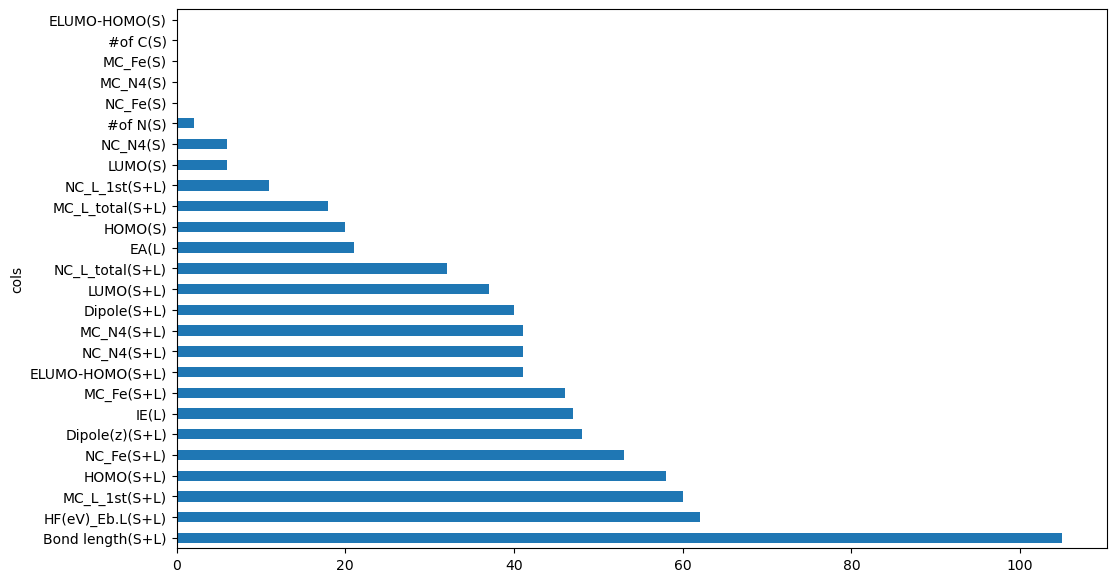

In [16]:
# plot the feature importance
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi)

### Random Forest

Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------------------
RandomForestRegressor(n_estimators=50, random_state=42)
best parameters: {'n_estimators': 50}
----------------------
train r2_score= 0.9442415607313263
test r2_score= 0.7273360179521917
rmse= 0.2511806572833164
mse= 0.06309172259327886
mae= 0.15830197044068964
cross_val: mean= 0.1004152683726907 , std= 0.02751273268467048


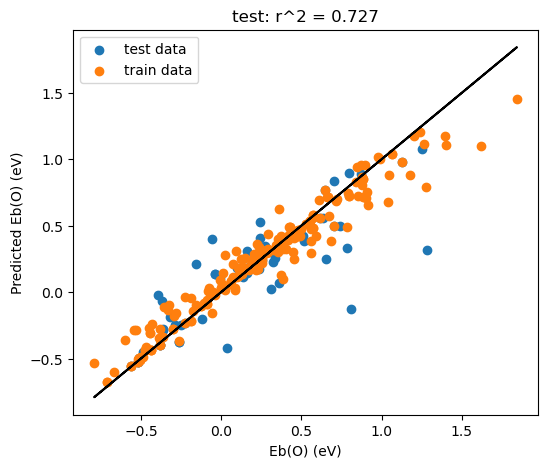

In [23]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':np.arange(50,450,50),
#               'max_depth':[2,4,6,8,10],
#               'min_samples_split':[2,4,6,8],
#              'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#               'max_features':[1,2,3,4]
              }

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid,
                                                        X_train=X_train_full,y_train=y_train_full,
                                                        X_test=X_test, y_test=y_test, splits=5, repeats=1)

# store model information, i.e. name, cross validation: mean and std
cv_score.name = model
score_models = score_models.append(cv_score)

In [26]:
# get the feature importance 

model = 'RandomForest'
fi=rf_feat_importance(opt_models[model],data_file.iloc[:,:-1])
fi

,cols,imp
25,NC_L_total(S+L),0.128954
24,NC_L_1st(S+L),0.095147
0,HOMO(S),0.081664
21,MC_L_total(S+L),0.064449
17,Dipole(S+L),0.058897
15,Bond length(S+L),0.052039
16,Dipole(z)(S+L),0.051780
18,MC_Fe(S+L),0.046014
11,HOMO(S+L),0.042165
23,NC_N4(S+L),0.039646


<AxesSubplot:ylabel='cols'>

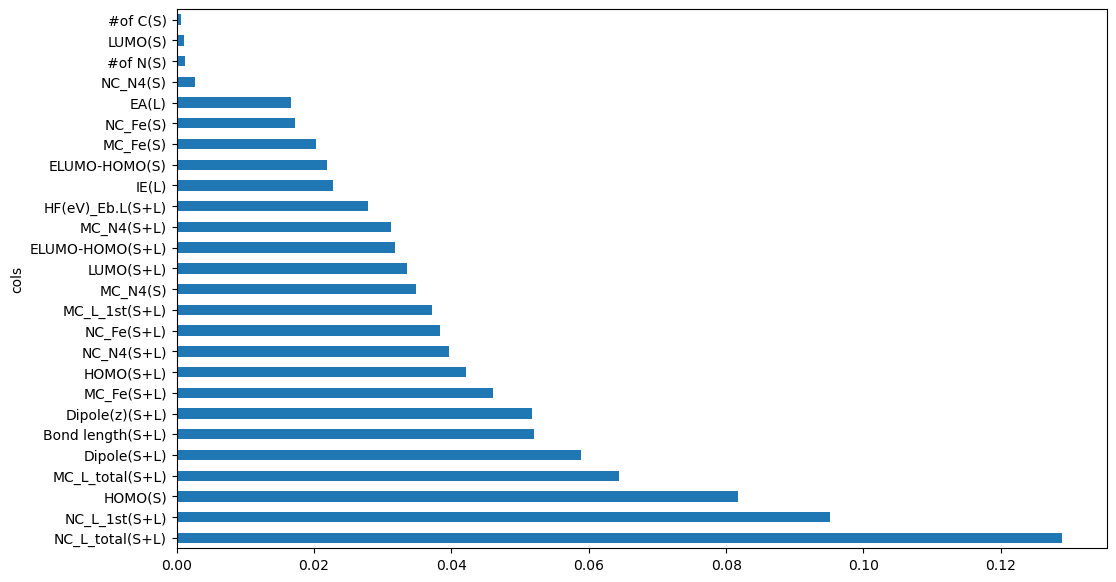

In [27]:
# plot the feature importance
plot_fi(fi)

In [28]:
score_models

,mean,std
LGBMRegressor,0.095306,0.024457
RandomForest,0.100415,0.027513


### For more models, you can use the upper template to build more models to find the best R2 score and hyperparameters